### Deliverable 3: Optimize a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# PREPROCESS DATA

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

#GROUP APPLICATION TYPES
application_type = application_df.APPLICATION_TYPE.value_counts()
replace_applications = list(application_type[application_type < 500].index)
# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

#GROUP CLASSIFICATION VALUES
classification_type = application_df.CLASSIFICATION.value_counts()
replace_classifications = list(classification_type[classification_type < 1000].index)

# Replace in dataframe
for cls in replace_classifications:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")

In [3]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [4]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)

In [5]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
 78/804 [=>............................] - ETA: 0s - loss: 0.6700 - accuracy: 0.5974  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.6453 - accuracy: 0.6360
Epoch 00001: saving model to checkpoints/weights.01.hdf5
297/804 [==========>...................] - ETA: 0s - loss: 0.6187 - accuracy: 0.6708
Epoch 00001: saving model to checkpoints/weights.01.hdf5
367/804 [============>.................] - ETA: 0s - loss: 0.6120 - accuracy: 0.6785
Epoch 00001: saving model to checkpoints/weights.01.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.6071 - accuracy: 0.6842
Epoch 00001: saving model to checkpoints/weights.01.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6000 - accuracy: 0.6919
Epoch 00001: saving model to checkpoints/weights.01.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5977 - accuracy: 0.6944
Epoch 00001: saving model to checkpoints/weights.

507/804 [=================>............] - ETA: 0s - loss: 0.5504 - accuracy: 0.7294
Epoch 00007: saving model to checkpoints/weights.07.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5498 - accuracy: 0.7301
Epoch 00007: saving model to checkpoints/weights.07.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5494 - accuracy: 0.7304
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 700us/step - loss: 0.5492 - accuracy: 0.7307
Epoch 8/100
  1/804 [..............................] - ETA: 0s - loss: 0.5568 - accuracy: 0.7188
Epoch 00008: saving model to checkpoints/weights.08.hdf5
156/804 [====>.........................] - ETA: 0s - loss: 0.5415 - accuracy: 0.7337
Epoch 00008: saving model to checkpoints/weights.08.hdf5
231/804 [=======>......................] - ETA: 0s - loss: 0.5431 - accuracy: 0.7339
Epoch 00008: saving model to checkpoints/weights.08.hdf5
305/804 [==========>...................] - ET

 71/804 [=>............................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7259
Epoch 00014: saving model to checkpoints/weights.14.hdf5
236/804 [=======>......................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7328
Epoch 00014: saving model to checkpoints/weights.14.hdf5
310/804 [==========>...................] - ETA: 0s - loss: 0.5416 - accuracy: 0.7324
Epoch 00014: saving model to checkpoints/weights.14.hdf5
385/804 [=============>................] - ETA: 0s - loss: 0.5426 - accuracy: 0.7324
Epoch 00014: saving model to checkpoints/weights.14.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5433 - accuracy: 0.7333
Epoch 00014: saving model to checkpoints/weights.14.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5435 - accuracy: 0.7336
Epoch 00014: saving model to checkpoints/weights.14.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5438 - accuracy: 0.7337
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/80

611/804 [=====================>........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7467
Epoch 00020: saving model to checkpoints/weights.20.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5323 - accuracy: 0.7457
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 668us/step - loss: 0.5337 - accuracy: 0.7444
Epoch 21/100
  1/804 [..............................] - ETA: 0s - loss: 0.6027 - accuracy: 0.7188
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 69/804 [=>............................] - ETA: 0s - loss: 0.5495 - accuracy: 0.7399
Epoch 00021: saving model to checkpoints/weights.21.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5404 - accuracy: 0.7444
Epoch 00021: saving model to checkpoints/weights.21.hdf5
305/804 [==========>...................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7414
Epoch 00021: saving model to checkpoints/weights.21.hdf5
381/804 [=============>................] - E

158/804 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7426
Epoch 00027: saving model to checkpoints/weights.27.hdf5
224/804 [=======>......................] - ETA: 0s - loss: 0.5349 - accuracy: 0.7405
Epoch 00027: saving model to checkpoints/weights.27.hdf5
378/804 [=============>................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7394
Epoch 00027: saving model to checkpoints/weights.27.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.5375 - accuracy: 0.7388
Epoch 00027: saving model to checkpoints/weights.27.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7383
Epoch 00027: saving model to checkpoints/weights.27.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7382
Epoch 00027: saving model to checkpoints/weights.27.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7381
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/80

590/804 [=====================>........] - ETA: 0s - loss: 0.5430 - accuracy: 0.7351
Epoch 00033: saving model to checkpoints/weights.33.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5425 - accuracy: 0.7354
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 676us/step - loss: 0.5424 - accuracy: 0.7355
Epoch 34/100
  1/804 [..............................] - ETA: 0s - loss: 0.4033 - accuracy: 0.8438
Epoch 00034: saving model to checkpoints/weights.34.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5251 - accuracy: 0.7563
Epoch 00034: saving model to checkpoints/weights.34.hdf5
221/804 [=======>......................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7500
Epoch 00034: saving model to checkpoints/weights.34.hdf5
364/804 [============>.................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7456
Epoch 00034: saving model to checkpoints/weights.34.hdf5
432/804 [===============>..............] - E

224/804 [=======>......................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7414
Epoch 00040: saving model to checkpoints/weights.40.hdf5
295/804 [==========>...................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7421
Epoch 00040: saving model to checkpoints/weights.40.hdf5
363/804 [============>.................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7422
Epoch 00040: saving model to checkpoints/weights.40.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7421
Epoch 00040: saving model to checkpoints/weights.40.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7418
Epoch 00040: saving model to checkpoints/weights.40.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7415
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 677us/step - loss: 0.5366 - accuracy: 0.7410
Epoch 41/100
  1/804 [..............................] - E

700/804 [=========================>....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7385
Epoch 00046: saving model to checkpoints/weights.46.hdf5
804/804 [==============================] - 1s 673us/step - loss: 0.5388 - accuracy: 0.7385
Epoch 47/100
  1/804 [..............................] - ETA: 0s - loss: 0.7113 - accuracy: 0.5625
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 69/804 [=>............................] - ETA: 0s - loss: 0.5621 - accuracy: 0.7204
Epoch 00047: saving model to checkpoints/weights.47.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5530 - accuracy: 0.7257
Epoch 00047: saving model to checkpoints/weights.47.hdf5
298/804 [==========>...................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7318
Epoch 00047: saving model to checkpoints/weights.47.hdf5
358/804 [============>.................] - ETA: 0s - loss: 0.5435 - accuracy: 0.7322
Epoch 00047: saving model to checkpoints/weights.47.hdf5
514/804 [==================>...........] - E

241/804 [=======>......................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7438
Epoch 00053: saving model to checkpoints/weights.53.hdf5
317/804 [==========>...................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7436
Epoch 00053: saving model to checkpoints/weights.53.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7427
Epoch 00053: saving model to checkpoints/weights.53.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7422
Epoch 00053: saving model to checkpoints/weights.53.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5324 - accuracy: 0.7419
Epoch 00053: saving model to checkpoints/weights.53.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7414
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 646us/step - loss: 0.5336 - accuracy: 0.7413
Epoch 54/100
  1/804 [..............................] - E

755/804 [===========================>..] - ETA: 0s - loss: 0.5365 - accuracy: 0.7397
Epoch 00059: saving model to checkpoints/weights.59.hdf5
804/804 [==============================] - 1s 677us/step - loss: 0.5366 - accuracy: 0.7397
Epoch 60/100
  1/804 [..............................] - ETA: 0s - loss: 0.4694 - accuracy: 0.7500
Epoch 00060: saving model to checkpoints/weights.60.hdf5
147/804 [====>.........................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7490
Epoch 00060: saving model to checkpoints/weights.60.hdf5
221/804 [=======>......................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7459
Epoch 00060: saving model to checkpoints/weights.60.hdf5
294/804 [=========>....................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7435
Epoch 00060: saving model to checkpoints/weights.60.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.5326 - accuracy: 0.7412
Epoch 00060: saving model to checkpoints/weights.60.hdf5
528/804 [==================>...........] - E

305/804 [==========>...................] - ETA: 0s - loss: 0.5248 - accuracy: 0.7516
Epoch 00066: saving model to checkpoints/weights.66.hdf5
371/804 [============>.................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7500
Epoch 00066: saving model to checkpoints/weights.66.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5290 - accuracy: 0.7479
Epoch 00066: saving model to checkpoints/weights.66.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7472
Epoch 00066: saving model to checkpoints/weights.66.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5304 - accuracy: 0.7466
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 671us/step - loss: 0.5317 - accuracy: 0.7455
Epoch 67/100
  1/804 [..............................] - ETA: 0s - loss: 0.5354 - accuracy: 0.6562
Epoch 00067: saving model to checkpoints/weights.67.hdf5
 70/804 [=>............................] - E

804/804 [==============================] - 1s 800us/step - loss: 0.5366 - accuracy: 0.7387
Epoch 73/100
  1/804 [..............................] - ETA: 0s - loss: 0.7137 - accuracy: 0.5938
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 73/804 [=>............................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7363
Epoch 00073: saving model to checkpoints/weights.73.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7402
Epoch 00073: saving model to checkpoints/weights.73.hdf5
299/804 [==========>...................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7380
Epoch 00073: saving model to checkpoints/weights.73.hdf5
372/804 [============>.................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7378
Epoch 00073: saving model to checkpoints/weights.73.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.5372 - accuracy: 0.7376
Epoch 00073: saving model to checkpoints/weights.73.hdf5
598/804 [=====================>........] - E

315/804 [==========>...................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7458
Epoch 00079: saving model to checkpoints/weights.79.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7438
Epoch 00079: saving model to checkpoints/weights.79.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7433
Epoch 00079: saving model to checkpoints/weights.79.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5366 - accuracy: 0.7429
Epoch 00079: saving model to checkpoints/weights.79.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7426
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 642us/step - loss: 0.5365 - accuracy: 0.7423
Epoch 80/100
  1/804 [..............................] - ETA: 0s - loss: 0.4376 - accuracy: 0.7812
Epoch 00080: saving model to checkpoints/weights.80.hdf5
165/804 [=====>........................] - E

804/804 [==============================] - 1s 652us/step - loss: 0.5428 - accuracy: 0.7301
Epoch 86/100
  1/804 [..............................] - ETA: 0s - loss: 0.5734 - accuracy: 0.6562
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 75/804 [=>............................] - ETA: 0s - loss: 0.5364 - accuracy: 0.7394
Epoch 00086: saving model to checkpoints/weights.86.hdf5
244/804 [========>.....................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7413
Epoch 00086: saving model to checkpoints/weights.86.hdf5
319/804 [==========>...................] - ETA: 0s - loss: 0.5363 - accuracy: 0.7407
Epoch 00086: saving model to checkpoints/weights.86.hdf5
393/804 [=============>................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7402
Epoch 00086: saving model to checkpoints/weights.86.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7403
Epoch 00086: saving model to checkpoints/weights.86.hdf5
600/804 [=====================>........] - E

374/804 [============>.................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7474
Epoch 00092: saving model to checkpoints/weights.92.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7465
Epoch 00092: saving model to checkpoints/weights.92.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5356 - accuracy: 0.7462
Epoch 00092: saving model to checkpoints/weights.92.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5356 - accuracy: 0.7458
Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 1s 663us/step - loss: 0.5357 - accuracy: 0.7449
Epoch 93/100
  1/804 [..............................] - ETA: 0s - loss: 0.4696 - accuracy: 0.7812
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 71/804 [=>............................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7401
Epoch 00093: saving model to checkpoints/weights.93.hdf5
229/804 [=======>......................] - E

  1/804 [..............................] - ETA: 0s - loss: 0.4687 - accuracy: 0.7812
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 68/804 [=>............................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7442
Epoch 00099: saving model to checkpoints/weights.99.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7426
Epoch 00099: saving model to checkpoints/weights.99.hdf5
289/804 [=========>....................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7434
Epoch 00099: saving model to checkpoints/weights.99.hdf5
394/804 [=============>................] - ETA: 0s - loss: 0.5306 - accuracy: 0.7427
Epoch 00099: saving model to checkpoints/weights.99.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.5318 - accuracy: 0.7420
Epoch 00099: saving model to checkpoints/weights.99.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7418
Epoch 00099: saving model to checkpoints/weights.99.hdf5
681/80

In [8]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5587 - accuracy: 0.7275
Loss: 0.5586679577827454, Accuracy: 0.7274635434150696


### OPTIMIZATION ATTEMPT 1 GOAL BEAT ACCURACY SCORE OF .727

In [9]:
# Remove noisy variables from features by increasing group bin sizes 
# application type from 500 to 5000
# Classification type from 1000 to 6000
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")

# PREPROCESS DATA

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

#GROUP APPLICATION TYPES
application_type = application_df.APPLICATION_TYPE.value_counts()
replace_applications = list(application_type[application_type < 5000].index)
# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

#GROUP CLASSIFICATION VALUES
classification_type = application_df.CLASSIFICATION.value_counts()
replace_classifications = list(classification_type[classification_type < 6000].index)

# Replace in dataframe
for cls in replace_classifications:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")

# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)

In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                2720      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,181
Trainable params: 5,181
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
 80/804 [=>............................] - ETA: 0s - loss: 0.6762 - accuracy: 0.6226  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
155/804 [====>.........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6510
Epoch 00001: saving model to checkpoints/weights.01.hdf5
228/804 [=======>......................] - ETA: 0s - loss: 0.6397 - accuracy: 0.6635
Epoch 00001: saving model to checkpoints/weights.01.hdf5
383/804 [=============>................] - ETA: 0s - loss: 0.6271 - accuracy: 0.6751
Epoch 00001: saving model to checkpoints/weights.01.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.6233 - accuracy: 0.6783
Epoch 00001: saving model to checkpoints/weights.01.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.6204 - accuracy: 0.6807
Epoch 00001: saving model to checkpoints/weights.01.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6157 - accuracy: 0.6846
Epoch 00001: saving model to checkpoints/weights.

574/804 [====================>.........] - ETA: 0s - loss: 0.5816 - accuracy: 0.7068
Epoch 00007: saving model to checkpoints/weights.07.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5812 - accuracy: 0.7076
Epoch 00007: saving model to checkpoints/weights.07.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5808 - accuracy: 0.7084
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 806us/step - loss: 0.5808 - accuracy: 0.7085
Epoch 8/100
 57/804 [=>............................] - ETA: 0s - loss: 0.5788 - accuracy: 0.7220
Epoch 00008: saving model to checkpoints/weights.08.hdf5
115/804 [===>..........................] - ETA: 0s - loss: 0.5780 - accuracy: 0.7216
Epoch 00008: saving model to checkpoints/weights.08.hdf5
266/804 [========>.....................] - ETA: 0s - loss: 0.5788 - accuracy: 0.7175
Epoch 00008: saving model to checkpoints/weights.08.hdf5
338/804 [===========>..................] - ET

 69/804 [=>............................] - ETA: 0s - loss: 0.5885 - accuracy: 0.7085
Epoch 00014: saving model to checkpoints/weights.14.hdf5
227/804 [=======>......................] - ETA: 0s - loss: 0.5840 - accuracy: 0.7106
Epoch 00014: saving model to checkpoints/weights.14.hdf5
298/804 [==========>...................] - ETA: 0s - loss: 0.5838 - accuracy: 0.7104
Epoch 00014: saving model to checkpoints/weights.14.hdf5
373/804 [============>.................] - ETA: 0s - loss: 0.5833 - accuracy: 0.7104
Epoch 00014: saving model to checkpoints/weights.14.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5822 - accuracy: 0.7107
Epoch 00014: saving model to checkpoints/weights.14.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5819 - accuracy: 0.7107
Epoch 00014: saving model to checkpoints/weights.14.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5816 - accuracy: 0.7108
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/80

618/804 [======================>.......] - ETA: 0s - loss: 0.5762 - accuracy: 0.7125
Epoch 00020: saving model to checkpoints/weights.20.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5764 - accuracy: 0.7127
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 662us/step - loss: 0.5766 - accuracy: 0.7130
Epoch 21/100
  1/804 [..............................] - ETA: 0s - loss: 0.5816 - accuracy: 0.7500
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 72/804 [=>............................] - ETA: 0s - loss: 0.5773 - accuracy: 0.7099
Epoch 00021: saving model to checkpoints/weights.21.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5801 - accuracy: 0.7063
Epoch 00021: saving model to checkpoints/weights.21.hdf5
306/804 [==========>...................] - ETA: 0s - loss: 0.5790 - accuracy: 0.7095
Epoch 00021: saving model to checkpoints/weights.21.hdf5
379/804 [=============>................] - E

147/804 [====>.........................] - ETA: 0s - loss: 0.5544 - accuracy: 0.7332
Epoch 00027: saving model to checkpoints/weights.27.hdf5
218/804 [=======>......................] - ETA: 0s - loss: 0.5590 - accuracy: 0.7292
Epoch 00027: saving model to checkpoints/weights.27.hdf5
377/804 [=============>................] - ETA: 0s - loss: 0.5652 - accuracy: 0.7239
Epoch 00027: saving model to checkpoints/weights.27.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.5667 - accuracy: 0.7227
Epoch 00027: saving model to checkpoints/weights.27.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5678 - accuracy: 0.7217
Epoch 00027: saving model to checkpoints/weights.27.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5696 - accuracy: 0.7202
Epoch 00027: saving model to checkpoints/weights.27.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5703 - accuracy: 0.7197
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/80

632/804 [======================>.......] - ETA: 0s - loss: 0.5774 - accuracy: 0.7132
Epoch 00033: saving model to checkpoints/weights.33.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5772 - accuracy: 0.7135
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 715us/step - loss: 0.5770 - accuracy: 0.7137
Epoch 34/100
  1/804 [..............................] - ETA: 1s - loss: 0.4888 - accuracy: 0.7500
Epoch 00034: saving model to checkpoints/weights.34.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.7140
Epoch 00034: saving model to checkpoints/weights.34.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5761 - accuracy: 0.7126
Epoch 00034: saving model to checkpoints/weights.34.hdf5
360/804 [============>.................] - ETA: 0s - loss: 0.5772 - accuracy: 0.7123
Epoch 00034: saving model to checkpoints/weights.34.hdf5
432/804 [===============>..............] - E

225/804 [=======>......................] - ETA: 0s - loss: 0.5733 - accuracy: 0.7157
Epoch 00040: saving model to checkpoints/weights.40.hdf5
295/804 [==========>...................] - ETA: 0s - loss: 0.5723 - accuracy: 0.7168
Epoch 00040: saving model to checkpoints/weights.40.hdf5
430/804 [===============>..............] - ETA: 0s - loss: 0.5713 - accuracy: 0.7178
Epoch 00040: saving model to checkpoints/weights.40.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5713 - accuracy: 0.7180
Epoch 00040: saving model to checkpoints/weights.40.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5715 - accuracy: 0.7179
Epoch 00040: saving model to checkpoints/weights.40.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5719 - accuracy: 0.7177
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 692us/step - loss: 0.5721 - accuracy: 0.7175
Epoch 41/100
  1/804 [..............................] - E

683/804 [========================>.....] - ETA: 0s - loss: 0.5634 - accuracy: 0.7231
Epoch 00046: saving model to checkpoints/weights.46.hdf5
804/804 [==============================] - 1s 672us/step - loss: 0.5650 - accuracy: 0.7220
Epoch 47/100
  1/804 [..............................] - ETA: 0s - loss: 0.5208 - accuracy: 0.7500
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 76/804 [=>............................] - ETA: 0s - loss: 0.5784 - accuracy: 0.7098
Epoch 00047: saving model to checkpoints/weights.47.hdf5
151/804 [====>.........................] - ETA: 0s - loss: 0.5816 - accuracy: 0.7071
Epoch 00047: saving model to checkpoints/weights.47.hdf5
307/804 [==========>...................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7087
Epoch 00047: saving model to checkpoints/weights.47.hdf5
379/804 [=============>................] - ETA: 0s - loss: 0.5798 - accuracy: 0.7096
Epoch 00047: saving model to checkpoints/weights.47.hdf5
452/804 [===============>..............] - E

233/804 [=======>......................] - ETA: 0s - loss: 0.5741 - accuracy: 0.7195
Epoch 00053: saving model to checkpoints/weights.53.hdf5
388/804 [=============>................] - ETA: 0s - loss: 0.5752 - accuracy: 0.7175
Epoch 00053: saving model to checkpoints/weights.53.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5750 - accuracy: 0.7174
Epoch 00053: saving model to checkpoints/weights.53.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5747 - accuracy: 0.7175
Epoch 00053: saving model to checkpoints/weights.53.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5742 - accuracy: 0.7175
Epoch 00053: saving model to checkpoints/weights.53.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5741 - accuracy: 0.7175
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 669us/step - loss: 0.5741 - accuracy: 0.7175
Epoch 54/100
 82/804 [==>...........................] - E

759/804 [===========================>..] - ETA: 0s - loss: 0.5738 - accuracy: 0.7169
Epoch 00059: saving model to checkpoints/weights.59.hdf5
804/804 [==============================] - 1s 677us/step - loss: 0.5738 - accuracy: 0.7168
Epoch 60/100
  1/804 [..............................] - ETA: 0s - loss: 0.6636 - accuracy: 0.6250
Epoch 00060: saving model to checkpoints/weights.60.hdf5
157/804 [====>.........................] - ETA: 0s - loss: 0.5697 - accuracy: 0.7209
Epoch 00060: saving model to checkpoints/weights.60.hdf5
232/804 [=======>......................] - ETA: 0s - loss: 0.5711 - accuracy: 0.7207
Epoch 00060: saving model to checkpoints/weights.60.hdf5
307/804 [==========>...................] - ETA: 0s - loss: 0.5715 - accuracy: 0.7208
Epoch 00060: saving model to checkpoints/weights.60.hdf5
380/804 [=============>................] - ETA: 0s - loss: 0.5719 - accuracy: 0.7207
Epoch 00060: saving model to checkpoints/weights.60.hdf5
549/804 [===================>..........] - E

308/804 [==========>...................] - ETA: 0s - loss: 0.5593 - accuracy: 0.7323
Epoch 00066: saving model to checkpoints/weights.66.hdf5
383/804 [=============>................] - ETA: 0s - loss: 0.5611 - accuracy: 0.7308
Epoch 00066: saving model to checkpoints/weights.66.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.5622 - accuracy: 0.7297
Epoch 00066: saving model to checkpoints/weights.66.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5647 - accuracy: 0.7269
Epoch 00066: saving model to checkpoints/weights.66.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5656 - accuracy: 0.7260
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 657us/step - loss: 0.5666 - accuracy: 0.7248
Epoch 67/100
  1/804 [..............................] - ETA: 0s - loss: 0.4736 - accuracy: 0.8125
Epoch 00067: saving model to checkpoints/weights.67.hdf5
 73/804 [=>............................] - E

804/804 [==============================] - 1s 751us/step - loss: 0.5707 - accuracy: 0.7184
Epoch 73/100
  1/804 [..............................] - ETA: 0s - loss: 0.5243 - accuracy: 0.7188
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5810 - accuracy: 0.6972
Epoch 00073: saving model to checkpoints/weights.73.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5762 - accuracy: 0.7086
Epoch 00073: saving model to checkpoints/weights.73.hdf5
300/804 [==========>...................] - ETA: 0s - loss: 0.5727 - accuracy: 0.7152
Epoch 00073: saving model to checkpoints/weights.73.hdf5
373/804 [============>.................] - ETA: 0s - loss: 0.5725 - accuracy: 0.7156
Epoch 00073: saving model to checkpoints/weights.73.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.5725 - accuracy: 0.7155
Epoch 00073: saving model to checkpoints/weights.73.hdf5
610/804 [=====================>........] - E

367/804 [============>.................] - ETA: 0s - loss: 0.5702 - accuracy: 0.7180
Epoch 00079: saving model to checkpoints/weights.79.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.5708 - accuracy: 0.7176
Epoch 00079: saving model to checkpoints/weights.79.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5712 - accuracy: 0.7173
Epoch 00079: saving model to checkpoints/weights.79.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5717 - accuracy: 0.7169
Epoch 00079: saving model to checkpoints/weights.79.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5717 - accuracy: 0.7169
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 686us/step - loss: 0.5718 - accuracy: 0.7169
Epoch 80/100
  1/804 [..............................] - ETA: 0s - loss: 0.3737 - accuracy: 0.8750
Epoch 00080: saving model to checkpoints/weights.80.hdf5
162/804 [=====>........................] - E

Epoch 86/100
  1/804 [..............................] - ETA: 0s - loss: 0.5519 - accuracy: 0.6875
Epoch 00086: saving model to checkpoints/weights.86.hdf5
156/804 [====>.........................] - ETA: 0s - loss: 0.5713 - accuracy: 0.7207
Epoch 00086: saving model to checkpoints/weights.86.hdf5
232/804 [=======>......................] - ETA: 0s - loss: 0.5695 - accuracy: 0.7215
Epoch 00086: saving model to checkpoints/weights.86.hdf5
304/804 [==========>...................] - ETA: 0s - loss: 0.5692 - accuracy: 0.7214
Epoch 00086: saving model to checkpoints/weights.86.hdf5
376/804 [=============>................] - ETA: 0s - loss: 0.5694 - accuracy: 0.7209
Epoch 00086: saving model to checkpoints/weights.86.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5699 - accuracy: 0.7200
Epoch 00086: saving model to checkpoints/weights.86.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5701 - accuracy: 0.7196
Epoch 00086: saving model to checkpoints/weights.8

464/804 [================>.............] - ETA: 0s - loss: 0.5724 - accuracy: 0.7145
Epoch 00092: saving model to checkpoints/weights.92.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5724 - accuracy: 0.7149
Epoch 00092: saving model to checkpoints/weights.92.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5724 - accuracy: 0.7150
Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 1s 660us/step - loss: 0.5724 - accuracy: 0.7153
Epoch 93/100
  1/804 [..............................] - ETA: 0s - loss: 0.4189 - accuracy: 0.8750
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 72/804 [=>............................] - ETA: 0s - loss: 0.5424 - accuracy: 0.7451
Epoch 00093: saving model to checkpoints/weights.93.hdf5
232/804 [=======>......................] - ETA: 0s - loss: 0.5564 - accuracy: 0.7319
Epoch 00093: saving model to checkpoints/weights.93.hdf5
302/804 [==========>...................] - E

 70/804 [=>............................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7197
Epoch 00099: saving model to checkpoints/weights.99.hdf5
145/804 [====>.........................] - ETA: 0s - loss: 0.5704 - accuracy: 0.7210
Epoch 00099: saving model to checkpoints/weights.99.hdf5
307/804 [==========>...................] - ETA: 0s - loss: 0.5723 - accuracy: 0.7172
Epoch 00099: saving model to checkpoints/weights.99.hdf5
380/804 [=============>................] - ETA: 0s - loss: 0.5723 - accuracy: 0.7167
Epoch 00099: saving model to checkpoints/weights.99.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.5723 - accuracy: 0.7163
Epoch 00099: saving model to checkpoints/weights.99.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5723 - accuracy: 0.7162
Epoch 00099: saving model to checkpoints/weights.99.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5723 - accuracy: 0.7161
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/80

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5910 - accuracy: 0.7068
Loss: 0.5909823775291443, Accuracy: 0.7068221569061279


### OPTIMIZATION ATTEMPT 2

In [14]:
# Try adding hidden layers and additional nodes.
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [15]:
# PREPROCESS DATA

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

#GROUP APPLICATION TYPES
application_type = application_df.APPLICATION_TYPE.value_counts()
replace_applications = list(application_type[application_type < 500].index)
# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

#GROUP CLASSIFICATION VALUES
classification_type = application_df.CLASSIFICATION.value_counts()
replace_classifications = list(classification_type[classification_type < 1000].index)

# Replace in dataframe
for cls in replace_classifications:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)

In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 128
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 32

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               5632      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
 66/804 [=>............................] - ETA: 0s - loss: 0.6587 - accuracy: 0.6332  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
124/804 [===>..........................] - ETA: 0s - loss: 0.6374 - accuracy: 0.6591
Epoch 00001: saving model to checkpoints/weights.01.hdf5
276/804 [=========>....................] - ETA: 0s - loss: 0.6122 - accuracy: 0.6848
Epoch 00001: saving model to checkpoints/weights.01.hdf5
341/804 [===========>..................] - ETA: 0s - loss: 0.6060 - accuracy: 0.6904
Epoch 00001: saving model to checkpoints/weights.01.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5966 - accuracy: 0.6988
Epoch 00001: saving model to checkpoints/weights.01.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5934 - accuracy: 0.7016
Epoch 00001: saving model to checkpoints/weights.01.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5885 - accuracy: 0.7053
Epoch 00001: saving model to checkpoints/weights.

502/804 [=================>............] - ETA: 0s - loss: 0.5380 - accuracy: 0.7403
Epoch 00007: saving model to checkpoints/weights.07.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5398 - accuracy: 0.7392
Epoch 00007: saving model to checkpoints/weights.07.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5404 - accuracy: 0.7389
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 790us/step - loss: 0.5412 - accuracy: 0.7384
Epoch 8/100
  1/804 [..............................] - ETA: 0s - loss: 0.5016 - accuracy: 0.7812
Epoch 00008: saving model to checkpoints/weights.08.hdf5
154/804 [====>.........................] - ETA: 0s - loss: 0.5545 - accuracy: 0.7282
Epoch 00008: saving model to checkpoints/weights.08.hdf5
219/804 [=======>......................] - ETA: 0s - loss: 0.5533 - accuracy: 0.7287
Epoch 00008: saving model to checkpoints/weights.08.hdf5
361/804 [============>.................] - ET

148/804 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7356
Epoch 00014: saving model to checkpoints/weights.14.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7362
Epoch 00014: saving model to checkpoints/weights.14.hdf5
276/804 [=========>....................] - ETA: 0s - loss: 0.5361 - accuracy: 0.7363
Epoch 00014: saving model to checkpoints/weights.14.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.5383 - accuracy: 0.7367
Epoch 00014: saving model to checkpoints/weights.14.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.5388 - accuracy: 0.7369
Epoch 00014: saving model to checkpoints/weights.14.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7371
Epoch 00014: saving model to checkpoints/weights.14.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7371
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/80

560/804 [===================>..........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7375
Epoch 00020: saving model to checkpoints/weights.20.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7376
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 784us/step - loss: 0.5417 - accuracy: 0.7376
Epoch 21/100
  1/804 [..............................] - ETA: 0s - loss: 0.4177 - accuracy: 0.8750
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5251 - accuracy: 0.7714
Epoch 00021: saving model to checkpoints/weights.21.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7573
Epoch 00021: saving model to checkpoints/weights.21.hdf5
262/804 [========>.....................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7536
Epoch 00021: saving model to checkpoints/weights.21.hdf5
401/804 [=============>................] - E

144/804 [====>.........................] - ETA: 0s - loss: 0.5222 - accuracy: 0.7483
Epoch 00027: saving model to checkpoints/weights.27.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7446
Epoch 00027: saving model to checkpoints/weights.27.hdf5
346/804 [===========>..................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7439
Epoch 00027: saving model to checkpoints/weights.27.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5306 - accuracy: 0.7423
Epoch 00027: saving model to checkpoints/weights.27.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7417
Epoch 00027: saving model to checkpoints/weights.27.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5331 - accuracy: 0.7409
Epoch 00027: saving model to checkpoints/weights.27.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5337 - accuracy: 0.7406
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/80

614/804 [=====================>........] - ETA: 0s - loss: 0.5371 - accuracy: 0.7408
Epoch 00033: saving model to checkpoints/weights.33.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5374 - accuracy: 0.7406
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 749us/step - loss: 0.5375 - accuracy: 0.7406
Epoch 34/100
  1/804 [..............................] - ETA: 0s - loss: 0.5824 - accuracy: 0.6562
Epoch 00034: saving model to checkpoints/weights.34.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5382 - accuracy: 0.7301
Epoch 00034: saving model to checkpoints/weights.34.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7309
Epoch 00034: saving model to checkpoints/weights.34.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7324
Epoch 00034: saving model to checkpoints/weights.34.hdf5
407/804 [==============>...............] - E

236/804 [=======>......................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7319
Epoch 00040: saving model to checkpoints/weights.40.hdf5
290/804 [=========>....................] - ETA: 0s - loss: 0.5427 - accuracy: 0.7329
Epoch 00040: saving model to checkpoints/weights.40.hdf5
431/804 [===============>..............] - ETA: 0s - loss: 0.5407 - accuracy: 0.7344
Epoch 00040: saving model to checkpoints/weights.40.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5403 - accuracy: 0.7348
Epoch 00040: saving model to checkpoints/weights.40.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5402 - accuracy: 0.7352
Epoch 00040: saving model to checkpoints/weights.40.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7354
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 797us/step - loss: 0.5400 - accuracy: 0.7359
Epoch 41/100
  1/804 [..............................] - E

659/804 [=======================>......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7398
Epoch 00046: saving model to checkpoints/weights.46.hdf5
804/804 [==============================] - 1s 763us/step - loss: 0.5363 - accuracy: 0.7400
Epoch 47/100
  1/804 [..............................] - ETA: 0s - loss: 0.5629 - accuracy: 0.6562
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5202 - accuracy: 0.7492
Epoch 00047: saving model to checkpoints/weights.47.hdf5
190/804 [======>.......................] - ETA: 0s - loss: 0.5212 - accuracy: 0.7510
Epoch 00047: saving model to checkpoints/weights.47.hdf5
254/804 [========>.....................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7497
Epoch 00047: saving model to checkpoints/weights.47.hdf5
394/804 [=============>................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7478
Epoch 00047: saving model to checkpoints/weights.47.hdf5
460/804 [================>.............] - E

278/804 [=========>....................] - ETA: 0s - loss: 0.5316 - accuracy: 0.7429
Epoch 00053: saving model to checkpoints/weights.53.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5314 - accuracy: 0.7431
Epoch 00053: saving model to checkpoints/weights.53.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5319 - accuracy: 0.7428
Epoch 00053: saving model to checkpoints/weights.53.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7426
Epoch 00053: saving model to checkpoints/weights.53.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5330 - accuracy: 0.7419
Epoch 00053: saving model to checkpoints/weights.53.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5334 - accuracy: 0.7415
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 754us/step - loss: 0.5337 - accuracy: 0.7413
Epoch 54/100
 71/804 [=>............................] - E

759/804 [===========================>..] - ETA: 0s - loss: 0.5355 - accuracy: 0.7401
Epoch 00059: saving model to checkpoints/weights.59.hdf5
804/804 [==============================] - 1s 743us/step - loss: 0.5355 - accuracy: 0.7401
Epoch 60/100
  1/804 [..............................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7812
Epoch 00060: saving model to checkpoints/weights.60.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5288 - accuracy: 0.7471
Epoch 00060: saving model to checkpoints/weights.60.hdf5
196/804 [======>.......................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7477
Epoch 00060: saving model to checkpoints/weights.60.hdf5
337/804 [===========>..................] - ETA: 0s - loss: 0.5277 - accuracy: 0.7468
Epoch 00060: saving model to checkpoints/weights.60.hdf5
398/804 [=============>................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7464
Epoch 00060: saving model to checkpoints/weights.60.hdf5
541/804 [===================>..........] - E

277/804 [=========>....................] - ETA: 0s - loss: 0.5398 - accuracy: 0.7353
Epoch 00066: saving model to checkpoints/weights.66.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5379 - accuracy: 0.7361
Epoch 00066: saving model to checkpoints/weights.66.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5372 - accuracy: 0.7366
Epoch 00066: saving model to checkpoints/weights.66.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7373
Epoch 00066: saving model to checkpoints/weights.66.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7375
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 751us/step - loss: 0.5360 - accuracy: 0.7378
Epoch 67/100
  1/804 [..............................] - ETA: 0s - loss: 0.5415 - accuracy: 0.7500
Epoch 00067: saving model to checkpoints/weights.67.hdf5
 66/804 [=>............................] - E

804/804 [==============================] - 1s 751us/step - loss: 0.5347 - accuracy: 0.7436
Epoch 73/100
  1/804 [..............................] - ETA: 0s - loss: 0.4976 - accuracy: 0.8125
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7392
Epoch 00073: saving model to checkpoints/weights.73.hdf5
198/804 [======>.......................] - ETA: 0s - loss: 0.5371 - accuracy: 0.7329
Epoch 00073: saving model to checkpoints/weights.73.hdf5
261/804 [========>.....................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7327
Epoch 00073: saving model to checkpoints/weights.73.hdf5
394/804 [=============>................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7328
Epoch 00073: saving model to checkpoints/weights.73.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.5399 - accuracy: 0.7329
Epoch 00073: saving model to checkpoints/weights.73.hdf5
599/804 [=====================>........] - E

350/804 [============>.................] - ETA: 0s - loss: 0.5401 - accuracy: 0.7363
Epoch 00079: saving model to checkpoints/weights.79.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.5379 - accuracy: 0.7381
Epoch 00079: saving model to checkpoints/weights.79.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7385
Epoch 00079: saving model to checkpoints/weights.79.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7388
Epoch 00079: saving model to checkpoints/weights.79.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5366 - accuracy: 0.7392
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 741us/step - loss: 0.5365 - accuracy: 0.7393
Epoch 80/100
 76/804 [=>............................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7466
Epoch 00080: saving model to checkpoints/weights.80.hdf5
136/804 [====>.........................] - E

804/804 [==============================] - 1s 775us/step - loss: 0.5348 - accuracy: 0.7391
Epoch 86/100
  1/804 [..............................] - ETA: 0s - loss: 0.4507 - accuracy: 0.7812
Epoch 00086: saving model to checkpoints/weights.86.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7429
Epoch 00086: saving model to checkpoints/weights.86.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7422
Epoch 00086: saving model to checkpoints/weights.86.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7416
Epoch 00086: saving model to checkpoints/weights.86.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5333 - accuracy: 0.7416
Epoch 00086: saving model to checkpoints/weights.86.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5331 - accuracy: 0.7416
Epoch 00086: saving model to checkpoints/weights.86.hdf5
611/804 [=====================>........] - E

408/804 [==============>...............] - ETA: 0s - loss: 0.5250 - accuracy: 0.7441
Epoch 00092: saving model to checkpoints/weights.92.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.5258 - accuracy: 0.7440
Epoch 00092: saving model to checkpoints/weights.92.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5276 - accuracy: 0.7431
Epoch 00092: saving model to checkpoints/weights.92.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5282 - accuracy: 0.7427
Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 1s 751us/step - loss: 0.5290 - accuracy: 0.7423
Epoch 93/100
  1/804 [..............................] - ETA: 0s - loss: 0.5166 - accuracy: 0.6875
Epoch 00093: saving model to checkpoints/weights.93.hdf5
130/804 [===>..........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.7235
Epoch 00093: saving model to checkpoints/weights.93.hdf5
191/804 [======>.......................] - E

  1/804 [..............................] - ETA: 0s - loss: 0.5106 - accuracy: 0.7500
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7486
Epoch 00099: saving model to checkpoints/weights.99.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7437
Epoch 00099: saving model to checkpoints/weights.99.hdf5
266/804 [========>.....................] - ETA: 0s - loss: 0.5304 - accuracy: 0.7431
Epoch 00099: saving model to checkpoints/weights.99.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5313 - accuracy: 0.7428
Epoch 00099: saving model to checkpoints/weights.99.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5315 - accuracy: 0.7428
Epoch 00099: saving model to checkpoints/weights.99.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7426
Epoch 00099: saving model to checkpoints/weights.99.hdf5
668/80

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5702 - accuracy: 0.7275
Loss: 0.5702322721481323, Accuracy: 0.7274635434150696


### Optimization Attempt 3

In [21]:
# Try shorting the application and classification "OTHER" types
# Try adding hidden layers, additional nodes, and add a different activation function
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [22]:
# PREPROCESS DATA

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

#GROUP APPLICATION TYPES
application_type = application_df.APPLICATION_TYPE.value_counts()
replace_applications = list(application_type[application_type < 1500].index)
# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

#GROUP CLASSIFICATION VALUES
classification_type = application_df.CLASSIFICATION.value_counts()
replace_classifications = list(classification_type[classification_type < 10000].index)

# Replace in dataframe
for cls in replace_classifications:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [23]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)

In [24]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 128
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 32

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               4352      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 14,721
Trainable params: 14,721
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
 68/804 [=>............................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6426  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
198/804 [======>.......................] - ETA: 0s - loss: 0.6219 - accuracy: 0.6793
Epoch 00001: saving model to checkpoints/weights.01.hdf5
255/804 [========>.....................] - ETA: 0s - loss: 0.6175 - accuracy: 0.6851
Epoch 00001: saving model to checkpoints/weights.01.hdf5
385/804 [=============>................] - ETA: 0s - loss: 0.6113 - accuracy: 0.6934
Epoch 00001: saving model to checkpoints/weights.01.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.6091 - accuracy: 0.6959
Epoch 00001: saving model to checkpoints/weights.01.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6049 - accuracy: 0.7004
Epoch 00001: saving model to checkpoints/weights.01.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6025 - accuracy: 0.7029
Epoch 00001: saving model to checkpoints/weights.

552/804 [===================>..........] - ETA: 0s - loss: 0.5750 - accuracy: 0.7243
Epoch 00007: saving model to checkpoints/weights.07.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5748 - accuracy: 0.7243
Epoch 00007: saving model to checkpoints/weights.07.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5750 - accuracy: 0.7241
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 752us/step - loss: 0.5750 - accuracy: 0.7240
Epoch 8/100
  1/804 [..............................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7500
Epoch 00008: saving model to checkpoints/weights.08.hdf5
153/804 [====>.........................] - ETA: 0s - loss: 0.5684 - accuracy: 0.7269
Epoch 00008: saving model to checkpoints/weights.08.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5684 - accuracy: 0.7269
Epoch 00008: saving model to checkpoints/weights.08.hdf5
339/804 [===========>..................] - ET

140/804 [====>.........................] - ETA: 0s - loss: 0.5827 - accuracy: 0.7126
Epoch 00014: saving model to checkpoints/weights.14.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5831 - accuracy: 0.7128
Epoch 00014: saving model to checkpoints/weights.14.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5797 - accuracy: 0.7172
Epoch 00014: saving model to checkpoints/weights.14.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5786 - accuracy: 0.7186
Epoch 00014: saving model to checkpoints/weights.14.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5772 - accuracy: 0.7204
Epoch 00014: saving model to checkpoints/weights.14.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5769 - accuracy: 0.7208
Epoch 00014: saving model to checkpoints/weights.14.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5761 - accuracy: 0.7217
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/80

593/804 [=====================>........] - ETA: 0s - loss: 0.5745 - accuracy: 0.7259
Epoch 00020: saving model to checkpoints/weights.20.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5743 - accuracy: 0.7259
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 756us/step - loss: 0.5739 - accuracy: 0.7258
Epoch 21/100
  1/804 [..............................] - ETA: 0s - loss: 0.6560 - accuracy: 0.6562
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5697 - accuracy: 0.7306
Epoch 00021: saving model to checkpoints/weights.21.hdf5
198/804 [======>.......................] - ETA: 0s - loss: 0.5685 - accuracy: 0.7303
Epoch 00021: saving model to checkpoints/weights.21.hdf5
260/804 [========>.....................] - ETA: 0s - loss: 0.5693 - accuracy: 0.7294
Epoch 00021: saving model to checkpoints/weights.21.hdf5
389/804 [=============>................] - E

138/804 [====>.........................] - ETA: 0s - loss: 0.5674 - accuracy: 0.7310
Epoch 00027: saving model to checkpoints/weights.27.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 0.5707 - accuracy: 0.7271
Epoch 00027: saving model to checkpoints/weights.27.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5715 - accuracy: 0.7266
Epoch 00027: saving model to checkpoints/weights.27.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5722 - accuracy: 0.7259
Epoch 00027: saving model to checkpoints/weights.27.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5725 - accuracy: 0.7255
Epoch 00027: saving model to checkpoints/weights.27.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5729 - accuracy: 0.7249
Epoch 00027: saving model to checkpoints/weights.27.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5728 - accuracy: 0.7249
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/80

618/804 [======================>.......] - ETA: 0s - loss: 0.5718 - accuracy: 0.7256
Epoch 00033: saving model to checkpoints/weights.33.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5714 - accuracy: 0.7259
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 749us/step - loss: 0.5714 - accuracy: 0.7259
Epoch 34/100
  1/804 [..............................] - ETA: 0s - loss: 0.6250 - accuracy: 0.6562
Epoch 00034: saving model to checkpoints/weights.34.hdf5
144/804 [====>.........................] - ETA: 0s - loss: 0.5673 - accuracy: 0.7255
Epoch 00034: saving model to checkpoints/weights.34.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5695 - accuracy: 0.7241
Epoch 00034: saving model to checkpoints/weights.34.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5706 - accuracy: 0.7241
Epoch 00034: saving model to checkpoints/weights.34.hdf5
413/804 [==============>...............] - E

206/804 [======>.......................] - ETA: 0s - loss: 0.5668 - accuracy: 0.7323
Epoch 00040: saving model to checkpoints/weights.40.hdf5
270/804 [=========>....................] - ETA: 0s - loss: 0.5676 - accuracy: 0.7311
Epoch 00040: saving model to checkpoints/weights.40.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5687 - accuracy: 0.7296
Epoch 00040: saving model to checkpoints/weights.40.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5689 - accuracy: 0.7293
Epoch 00040: saving model to checkpoints/weights.40.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5695 - accuracy: 0.7286
Epoch 00040: saving model to checkpoints/weights.40.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5697 - accuracy: 0.7283
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 743us/step - loss: 0.5699 - accuracy: 0.7280
Epoch 41/100
  1/804 [..............................] - E

667/804 [=======================>......] - ETA: 0s - loss: 0.5613 - accuracy: 0.7304
Epoch 00046: saving model to checkpoints/weights.46.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5625 - accuracy: 0.7298
Epoch 47/100
  1/804 [..............................] - ETA: 0s - loss: 0.6730 - accuracy: 0.6562
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5755 - accuracy: 0.7199
Epoch 00047: saving model to checkpoints/weights.47.hdf5
201/804 [======>.......................] - ETA: 0s - loss: 0.5676 - accuracy: 0.7280
Epoch 00047: saving model to checkpoints/weights.47.hdf5
267/804 [========>.....................] - ETA: 0s - loss: 0.5666 - accuracy: 0.7287
Epoch 00047: saving model to checkpoints/weights.47.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5659 - accuracy: 0.7293
Epoch 00047: saving model to checkpoints/weights.47.hdf5
471/804 [================>.............] - E

285/804 [=========>....................] - ETA: 0s - loss: 0.5769 - accuracy: 0.7233
Epoch 00053: saving model to checkpoints/weights.53.hdf5
349/804 [============>.................] - ETA: 0s - loss: 0.5766 - accuracy: 0.7230
Epoch 00053: saving model to checkpoints/weights.53.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.5757 - accuracy: 0.7230
Epoch 00053: saving model to checkpoints/weights.53.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5752 - accuracy: 0.7233
Epoch 00053: saving model to checkpoints/weights.53.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5747 - accuracy: 0.7234
Epoch 00053: saving model to checkpoints/weights.53.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5740 - accuracy: 0.7236
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 738us/step - loss: 0.5738 - accuracy: 0.7238
Epoch 54/100
 78/804 [=>............................] - E

753/804 [===========================>..] - ETA: 0s - loss: 0.5678 - accuracy: 0.7273
Epoch 00059: saving model to checkpoints/weights.59.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5679 - accuracy: 0.7273
Epoch 60/100
  1/804 [..............................] - ETA: 0s - loss: 0.4498 - accuracy: 0.8438
Epoch 00060: saving model to checkpoints/weights.60.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5715 - accuracy: 0.7240
Epoch 00060: saving model to checkpoints/weights.60.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5696 - accuracy: 0.7259
Epoch 00060: saving model to checkpoints/weights.60.hdf5
333/804 [===========>..................] - ETA: 0s - loss: 0.5691 - accuracy: 0.7267
Epoch 00060: saving model to checkpoints/weights.60.hdf5
398/804 [=============>................] - ETA: 0s - loss: 0.5685 - accuracy: 0.7273
Epoch 00060: saving model to checkpoints/weights.60.hdf5
545/804 [===================>..........] - E

266/804 [========>.....................] - ETA: 0s - loss: 0.5671 - accuracy: 0.7283
Epoch 00066: saving model to checkpoints/weights.66.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.5668 - accuracy: 0.7282
Epoch 00066: saving model to checkpoints/weights.66.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.5668 - accuracy: 0.7283
Epoch 00066: saving model to checkpoints/weights.66.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5668 - accuracy: 0.7282
Epoch 00066: saving model to checkpoints/weights.66.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5669 - accuracy: 0.7282
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 738us/step - loss: 0.5672 - accuracy: 0.7279
Epoch 67/100
  1/804 [..............................] - ETA: 0s - loss: 0.6438 - accuracy: 0.6562
Epoch 00067: saving model to checkpoints/weights.67.hdf5
 65/804 [=>............................] - E

804/804 [==============================] - 1s 750us/step - loss: 0.5676 - accuracy: 0.7266
Epoch 73/100
  1/804 [..............................] - ETA: 0s - loss: 0.5666 - accuracy: 0.7188
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5753 - accuracy: 0.7178
Epoch 00073: saving model to checkpoints/weights.73.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5764 - accuracy: 0.7171
Epoch 00073: saving model to checkpoints/weights.73.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5754 - accuracy: 0.7181
Epoch 00073: saving model to checkpoints/weights.73.hdf5
337/804 [===========>..................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7192
Epoch 00073: saving model to checkpoints/weights.73.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5731 - accuracy: 0.7211
Epoch 00073: saving model to checkpoints/weights.73.hdf5
556/804 [===================>..........] - E

345/804 [===========>..................] - ETA: 0s - loss: 0.5669 - accuracy: 0.7255
Epoch 00079: saving model to checkpoints/weights.79.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.5678 - accuracy: 0.7251
Epoch 00079: saving model to checkpoints/weights.79.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5680 - accuracy: 0.7251
Epoch 00079: saving model to checkpoints/weights.79.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5681 - accuracy: 0.7255
Epoch 00079: saving model to checkpoints/weights.79.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5681 - accuracy: 0.7257
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 744us/step - loss: 0.5680 - accuracy: 0.7258
Epoch 80/100
 81/804 [==>...........................] - ETA: 0s - loss: 0.5543 - accuracy: 0.7408
Epoch 00080: saving model to checkpoints/weights.80.hdf5
145/804 [====>.........................] - E

Epoch 86/100
  1/804 [..............................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8438
Epoch 00086: saving model to checkpoints/weights.86.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5508 - accuracy: 0.7396
Epoch 00086: saving model to checkpoints/weights.86.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5537 - accuracy: 0.7371
Epoch 00086: saving model to checkpoints/weights.86.hdf5
341/804 [===========>..................] - ETA: 0s - loss: 0.5571 - accuracy: 0.7350
Epoch 00086: saving model to checkpoints/weights.86.hdf5
405/804 [==============>...............] - ETA: 0s - loss: 0.5582 - accuracy: 0.7344
Epoch 00086: saving model to checkpoints/weights.86.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5597 - accuracy: 0.7336
Epoch 00086: saving model to checkpoints/weights.86.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5603 - accuracy: 0.7332
Epoch 00086: saving model to checkpoints/weights.8

467/804 [================>.............] - ETA: 0s - loss: 0.5695 - accuracy: 0.7254
Epoch 00092: saving model to checkpoints/weights.92.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5686 - accuracy: 0.7264
Epoch 00092: saving model to checkpoints/weights.92.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5685 - accuracy: 0.7266
Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 1s 766us/step - loss: 0.5684 - accuracy: 0.7267
Epoch 93/100
  1/804 [..............................] - ETA: 0s - loss: 0.4797 - accuracy: 0.8125
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5582 - accuracy: 0.7360
Epoch 00093: saving model to checkpoints/weights.93.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5671 - accuracy: 0.7272
Epoch 00093: saving model to checkpoints/weights.93.hdf5
273/804 [=========>....................] - E

 59/804 [=>............................] - ETA: 0s - loss: 0.5939 - accuracy: 0.7100
Epoch 00099: saving model to checkpoints/weights.99.hdf5
193/804 [======>.......................] - ETA: 0s - loss: 0.5783 - accuracy: 0.7216
Epoch 00099: saving model to checkpoints/weights.99.hdf5
253/804 [========>.....................] - ETA: 0s - loss: 0.5761 - accuracy: 0.7232
Epoch 00099: saving model to checkpoints/weights.99.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.5739 - accuracy: 0.7248
Epoch 00099: saving model to checkpoints/weights.99.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.5735 - accuracy: 0.7249
Epoch 00099: saving model to checkpoints/weights.99.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5728 - accuracy: 0.7250
Epoch 00099: saving model to checkpoints/weights.99.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5725 - accuracy: 0.7250
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/80

In [27]:
## Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5903 - accuracy: 0.7187
Loss: 0.5903252363204956, Accuracy: 0.7187172174453735


In [28]:
# Export our model to HDF5 file
#nn.save("AlphabetSoupCharity_Optimization.h5")

### OPTIMIZATION ATTEMPT 4

In [29]:
# Try Dropping Ask Amounts Above 1M
# Try adding hidden layers, additional nodes, and add a different activation function
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [30]:
# PREPROCESS DATA

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

#GROUP APPLICATION TYPES
application_type = application_df.APPLICATION_TYPE.value_counts()
replace_applications = list(application_type[application_type < 50].index)
# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

#GROUP CLASSIFICATION VALUES
classification_type = application_df.CLASSIFICATION.value_counts()
replace_classifications = list(classification_type[classification_type < 50].index)

# Replace in dataframe
for cls in replace_classifications:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()


In [31]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)

In [32]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 128
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 32

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               7168      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
 70/804 [=>............................] - ETA: 0s - loss: 0.6445 - accuracy: 0.6601  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
130/804 [===>..........................] - ETA: 0s - loss: 0.6218 - accuracy: 0.6816
Epoch 00001: saving model to checkpoints/weights.01.hdf5
278/804 [=========>....................] - ETA: 0s - loss: 0.6026 - accuracy: 0.6985
Epoch 00001: saving model to checkpoints/weights.01.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5975 - accuracy: 0.7026
Epoch 00001: saving model to checkpoints/weights.01.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5900 - accuracy: 0.7083
Epoch 00001: saving model to checkpoints/weights.01.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.5876 - accuracy: 0.7100
Epoch 00001: saving model to checkpoints/weights.01.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5841 - accuracy: 0.7124
Epoch 00001: saving model to checkpoints/weights.

533/804 [==================>...........] - ETA: 0s - loss: 0.5395 - accuracy: 0.7402
Epoch 00007: saving model to checkpoints/weights.07.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7391
Epoch 00007: saving model to checkpoints/weights.07.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5410 - accuracy: 0.7386
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 754us/step - loss: 0.5414 - accuracy: 0.7382
Epoch 8/100
  1/804 [..............................] - ETA: 0s - loss: 0.5105 - accuracy: 0.8125
Epoch 00008: saving model to checkpoints/weights.08.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7408
Epoch 00008: saving model to checkpoints/weights.08.hdf5
213/804 [======>.......................] - ETA: 0s - loss: 0.5423 - accuracy: 0.7399
Epoch 00008: saving model to checkpoints/weights.08.hdf5
349/804 [============>.................] - ET

127/804 [===>..........................] - ETA: 0s - loss: 0.5287 - accuracy: 0.7462
Epoch 00014: saving model to checkpoints/weights.14.hdf5
192/804 [======>.......................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7432
Epoch 00014: saving model to checkpoints/weights.14.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7408
Epoch 00014: saving model to checkpoints/weights.14.hdf5
393/804 [=============>................] - ETA: 0s - loss: 0.5356 - accuracy: 0.7396
Epoch 00014: saving model to checkpoints/weights.14.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7386
Epoch 00014: saving model to checkpoints/weights.14.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7383
Epoch 00014: saving model to checkpoints/weights.14.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5386 - accuracy: 0.7378
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/80

600/804 [=====================>........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7398
Epoch 00020: saving model to checkpoints/weights.20.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5380 - accuracy: 0.7396
Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 1s 765us/step - loss: 0.5382 - accuracy: 0.7394
Epoch 21/100
  1/804 [..............................] - ETA: 0s - loss: 0.4702 - accuracy: 0.8125
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5410 - accuracy: 0.7347
Epoch 00021: saving model to checkpoints/weights.21.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7345
Epoch 00021: saving model to checkpoints/weights.21.hdf5
270/804 [=========>....................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7354
Epoch 00021: saving model to checkpoints/weights.21.hdf5
411/804 [==============>...............] - E

137/804 [====>.........................] - ETA: 0s - loss: 0.5248 - accuracy: 0.7517
Epoch 00027: saving model to checkpoints/weights.27.hdf5
266/804 [========>.....................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7454
Epoch 00027: saving model to checkpoints/weights.27.hdf5
331/804 [===========>..................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7444
Epoch 00027: saving model to checkpoints/weights.27.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.5341 - accuracy: 0.7435
Epoch 00027: saving model to checkpoints/weights.27.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5346 - accuracy: 0.7430
Epoch 00027: saving model to checkpoints/weights.27.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7424
Epoch 00027: saving model to checkpoints/weights.27.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5351 - accuracy: 0.7422
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/80

609/804 [=====================>........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7362
Epoch 00033: saving model to checkpoints/weights.33.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5375 - accuracy: 0.7370
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 1s 758us/step - loss: 0.5373 - accuracy: 0.7373
Epoch 34/100
  1/804 [..............................] - ETA: 0s - loss: 0.5488 - accuracy: 0.7500
Epoch 00034: saving model to checkpoints/weights.34.hdf5
145/804 [====>.........................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7402
Epoch 00034: saving model to checkpoints/weights.34.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5365 - accuracy: 0.7410
Epoch 00034: saving model to checkpoints/weights.34.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5363 - accuracy: 0.7407
Epoch 00034: saving model to checkpoints/weights.34.hdf5
411/804 [==============>...............] - E

198/804 [======>.......................] - ETA: 0s - loss: 0.5210 - accuracy: 0.7503
Epoch 00040: saving model to checkpoints/weights.40.hdf5
338/804 [===========>..................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7459
Epoch 00040: saving model to checkpoints/weights.40.hdf5
403/804 [==============>...............] - ETA: 0s - loss: 0.5280 - accuracy: 0.7451
Epoch 00040: saving model to checkpoints/weights.40.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7442
Epoch 00040: saving model to checkpoints/weights.40.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7440
Epoch 00040: saving model to checkpoints/weights.40.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5304 - accuracy: 0.7439
Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 1s 746us/step - loss: 0.5308 - accuracy: 0.7435
Epoch 41/100
  1/804 [..............................] - E

685/804 [========================>.....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7448
Epoch 00046: saving model to checkpoints/weights.46.hdf5
804/804 [==============================] - 1s 734us/step - loss: 0.5314 - accuracy: 0.7443
Epoch 47/100
  1/804 [..............................] - ETA: 0s - loss: 0.4682 - accuracy: 0.7812
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5194 - accuracy: 0.7475
Epoch 00047: saving model to checkpoints/weights.47.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5222 - accuracy: 0.7471
Epoch 00047: saving model to checkpoints/weights.47.hdf5
269/804 [=========>....................] - ETA: 0s - loss: 0.5241 - accuracy: 0.7456
Epoch 00047: saving model to checkpoints/weights.47.hdf5
411/804 [==============>...............] - ETA: 0s - loss: 0.5254 - accuracy: 0.7453
Epoch 00047: saving model to checkpoints/weights.47.hdf5
474/804 [================>.............] - E

292/804 [=========>....................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7389
Epoch 00053: saving model to checkpoints/weights.53.hdf5
356/804 [============>.................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7392
Epoch 00053: saving model to checkpoints/weights.53.hdf5
420/804 [==============>...............] - ETA: 0s - loss: 0.5349 - accuracy: 0.7391
Epoch 00053: saving model to checkpoints/weights.53.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5352 - accuracy: 0.7388
Epoch 00053: saving model to checkpoints/weights.53.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7387
Epoch 00053: saving model to checkpoints/weights.53.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5349 - accuracy: 0.7389
Epoch 00053: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 1s 730us/step - loss: 0.5348 - accuracy: 0.7390
Epoch 54/100
 78/804 [=>............................] - E

753/804 [===========================>..] - ETA: 0s - loss: 0.5279 - accuracy: 0.7443
Epoch 00059: saving model to checkpoints/weights.59.hdf5
804/804 [==============================] - 1s 758us/step - loss: 0.5281 - accuracy: 0.7442
Epoch 60/100
  1/804 [..............................] - ETA: 0s - loss: 0.6106 - accuracy: 0.6875
Epoch 00060: saving model to checkpoints/weights.60.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7314
Epoch 00060: saving model to checkpoints/weights.60.hdf5
201/804 [======>.......................] - ETA: 0s - loss: 0.5380 - accuracy: 0.7330
Epoch 00060: saving model to checkpoints/weights.60.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7357
Epoch 00060: saving model to checkpoints/weights.60.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.5360 - accuracy: 0.7363
Epoch 00060: saving model to checkpoints/weights.60.hdf5
540/804 [===================>..........] - E

327/804 [===========>..................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7425
Epoch 00066: saving model to checkpoints/weights.66.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.5285 - accuracy: 0.7419
Epoch 00066: saving model to checkpoints/weights.66.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5289 - accuracy: 0.7414
Epoch 00066: saving model to checkpoints/weights.66.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5292 - accuracy: 0.7413
Epoch 00066: saving model to checkpoints/weights.66.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5294 - accuracy: 0.7413
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5295 - accuracy: 0.7415
Epoch 67/100
  1/804 [..............................] - ETA: 0s - loss: 0.4799 - accuracy: 0.7500
Epoch 00067: saving model to checkpoints/weights.67.hdf5
 62/804 [=>............................] - E

804/804 [==============================] - 1s 761us/step - loss: 0.5316 - accuracy: 0.7417
Epoch 73/100
  1/804 [..............................] - ETA: 0s - loss: 0.6541 - accuracy: 0.6250
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5389 - accuracy: 0.7291
Epoch 00073: saving model to checkpoints/weights.73.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5322 - accuracy: 0.7369
Epoch 00073: saving model to checkpoints/weights.73.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5318 - accuracy: 0.7375
Epoch 00073: saving model to checkpoints/weights.73.hdf5
411/804 [==============>...............] - ETA: 0s - loss: 0.5310 - accuracy: 0.7386
Epoch 00073: saving model to checkpoints/weights.73.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5305 - accuracy: 0.7392
Epoch 00073: saving model to checkpoints/weights.73.hdf5
541/804 [===================>..........] - E

350/804 [============>.................] - ETA: 0s - loss: 0.5245 - accuracy: 0.7463
Epoch 00079: saving model to checkpoints/weights.79.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5259 - accuracy: 0.7452
Epoch 00079: saving model to checkpoints/weights.79.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5264 - accuracy: 0.7447
Epoch 00079: saving model to checkpoints/weights.79.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5270 - accuracy: 0.7442
Epoch 00079: saving model to checkpoints/weights.79.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5273 - accuracy: 0.7439
Epoch 00079: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5275 - accuracy: 0.7438
Epoch 80/100
 75/804 [=>............................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7413
Epoch 00080: saving model to checkpoints/weights.80.hdf5
135/804 [====>.........................] - E

804/804 [==============================] - 1s 757us/step - loss: 0.5237 - accuracy: 0.7446
Epoch 86/100
  1/804 [..............................] - ETA: 0s - loss: 0.4709 - accuracy: 0.6875
Epoch 00086: saving model to checkpoints/weights.86.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5400 - accuracy: 0.7302
Epoch 00086: saving model to checkpoints/weights.86.hdf5
201/804 [======>.......................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7332
Epoch 00086: saving model to checkpoints/weights.86.hdf5
316/804 [==========>...................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7367
Epoch 00086: saving model to checkpoints/weights.86.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5341 - accuracy: 0.7378
Epoch 00086: saving model to checkpoints/weights.86.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7390
Epoch 00086: saving model to checkpoints/weights.86.hdf5
607/804 [=====================>........] - E

417/804 [==============>...............] - ETA: 0s - loss: 0.5235 - accuracy: 0.7471
Epoch 00092: saving model to checkpoints/weights.92.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.5242 - accuracy: 0.7463
Epoch 00092: saving model to checkpoints/weights.92.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5254 - accuracy: 0.7452
Epoch 00092: saving model to checkpoints/weights.92.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5258 - accuracy: 0.7449
Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 1s 737us/step - loss: 0.5262 - accuracy: 0.7447
Epoch 93/100
  1/804 [..............................] - ETA: 0s - loss: 0.5569 - accuracy: 0.7500
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 69/804 [=>............................] - ETA: 0s - loss: 0.5221 - accuracy: 0.7440
Epoch 00093: saving model to checkpoints/weights.93.hdf5
210/804 [======>.......................] - E

  1/804 [..............................] - ETA: 0s - loss: 0.3370 - accuracy: 0.8438
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.4810 - accuracy: 0.7784
Epoch 00099: saving model to checkpoints/weights.99.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5102 - accuracy: 0.7577
Epoch 00099: saving model to checkpoints/weights.99.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5141 - accuracy: 0.7544
Epoch 00099: saving model to checkpoints/weights.99.hdf5
335/804 [===========>..................] - ETA: 0s - loss: 0.5166 - accuracy: 0.7522
Epoch 00099: saving model to checkpoints/weights.99.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5206 - accuracy: 0.7489
Epoch 00099: saving model to checkpoints/weights.99.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5215 - accuracy: 0.7482
Epoch 00099: saving model to checkpoints/weights.99.hdf5
688/80

In [35]:
## Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5607 - accuracy: 0.7303
Loss: 0.560738742351532, Accuracy: 0.7302623987197876


### Optimization Attempt 5

In [46]:
# Assess and remove the largest Ask Amounts ($4M+), which are EXTREME OUTLIERS in our dataset.
# Revert the Classification & Application Types to the original model
# Try adding hidden layers and additional neurons.

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


<AxesSubplot:xlabel='IS_SUCCESSFUL', ylabel='ASK_AMT'>

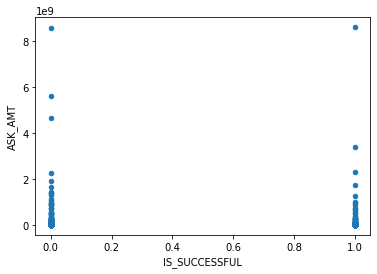

In [47]:
application_df.plot.scatter(
x = 'IS_SUCCESSFUL',
y = 'ASK_AMT')

In [37]:
# PREPROCESS DATA

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

#GROUP APPLICATION TYPES
application_type = application_df.APPLICATION_TYPE.value_counts()
replace_applications = list(application_type[application_type < 500].index)
# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

#GROUP CLASSIFICATION VALUES
classification_type = application_df.CLASSIFICATION.value_counts()
replace_classifications = list(classification_type[classification_type < 1000].index)

# Replace in dataframe
for cls in replace_classifications:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [38]:
index_names = application_df[(application_df['ASK_AMT']<=4000000)].index
application_df.drop(index_names, inplace=True)

In [39]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)

In [40]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
application_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N
count,15.0,1.500000e+01,15.000000,15.0,15.0,15.000000,15.0,15.000000,15.0,15.0,...,15.000000,15.0,15.0,15.0,15.000000,15.000000,15.0,15.000000,15.000000,15.0
mean,1.0,5.932884e+07,0.733333,0.0,0.0,0.933333,0.0,0.066667,0.0,0.0,...,0.866667,0.0,0.0,0.0,0.266667,0.400000,0.0,0.266667,0.066667,1.0
std,0.0,1.147113e+08,0.457738,0.0,0.0,0.258199,0.0,0.258199,0.0,0.0,...,0.351866,0.0,0.0,0.0,0.457738,0.507093,0.0,0.457738,0.258199,0.0
min,1.0,4.108874e+06,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0
25%,1.0,5.056932e+06,0.500000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0
50%,1.0,1.093579e+07,1.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0
75%,1.0,2.757414e+07,1.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.500000,1.000000,0.0,0.500000,0.000000,1.0
max,1.0,4.069662e+08,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,...,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.0


In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 128
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 32

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               4864      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 15,233
Trainable params: 15,233
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 0.7506 - accuracy: 0.3636
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7219 - accuracy: 0.4545
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.4545
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5455
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.7273
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.7273
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.7273
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6179 - accuracy: 0.7273
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.7273
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7273
Epoch 11/100
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.8182
Epoch 85/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.8182
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.8182
Epoch 87/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.8182
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.8182
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.8182
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.8182
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.8182
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1990 - accuracy: 0.8182
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9091
Epoch 94/100
1/1 [===============

In [44]:
## Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 2.1539 - accuracy: 0.7500
Loss: 2.153899669647217, Accuracy: 0.75


In [45]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimized.h5")